In [4]:
import subprocess
import pickle
import matplotlib.pyplot as plt

In [5]:
def initialize_experiment() -> None:
    subprocess.run(["make"])

def run_experiment(strategy: str, distribution: str, operations_number: int, repetitions: int) -> float:
    result = subprocess.run(f"./experiment {strategy} {distribution} {operations_number} {repetitions}",
                            shell=True, capture_output=True, text=True)
    return float(result.stdout)

def clean_experiment() -> None:
    subprocess.run(["make", "clean"])

In [6]:
STRATEGIES = ["none", "move-to-front", "transpose", "count"]
DISTRIBUTIONS = ["uniform", "geometric", "harmonic", "biharmonic"]
OPERATION_NUMBERS = [0, 100, 500, 1000, 5000, 10000, 50000, 100000]
REPS = 100

initialize_experiment()

results = {}
for distribution in DISTRIBUTIONS:
    results[distribution] = {}
    for strategy in STRATEGIES:
        results[distribution][strategy] = {}
        xs = []
        ys = []
        for x in OPERATION_NUMBERS:
            xs.append(x)
            ys.append(run_experiment(strategy, distribution, x, REPS))
        results[distribution][strategy]["xs"] = xs
        results[distribution][strategy]["ys"] = ys

with open("results.pkl", "wb") as f:
    pickle.dump(results, f)
        
clean_experiment()

make: Nothing to be done for 'all'.
rm -f experiment


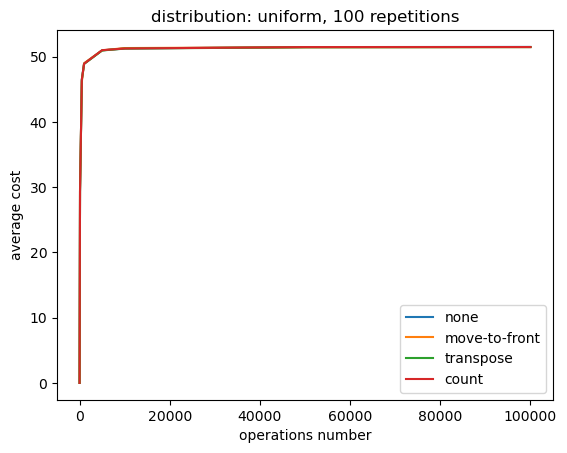

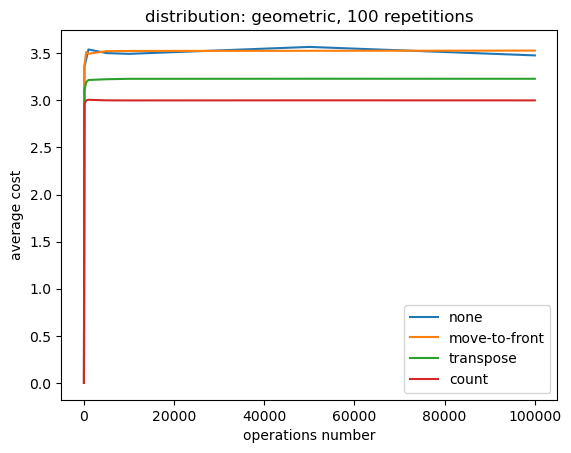

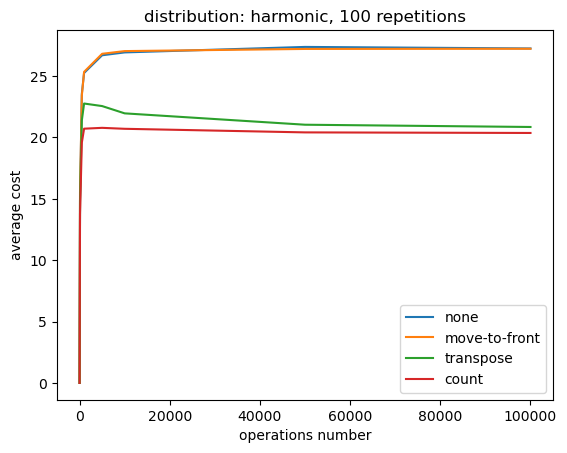

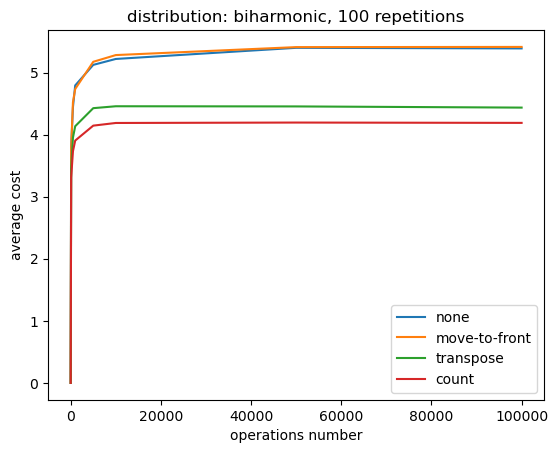

In [7]:
with open("results.pkl", "rb") as f:
    results = pickle.load(f)

for distribution in DISTRIBUTIONS:
    for strategy in STRATEGIES:
        plt.plot(results[distribution][strategy]["xs"], results[distribution][strategy]["ys"], label=f"{strategy}")
    
    plt.xlabel("operations number")
    plt.ylabel("average cost")
    plt.title(f"distribution: {distribution}, {REPS} repetitions")
    plt.legend()
    plt.savefig(f"plots/{distribution}.png")
    plt.show()

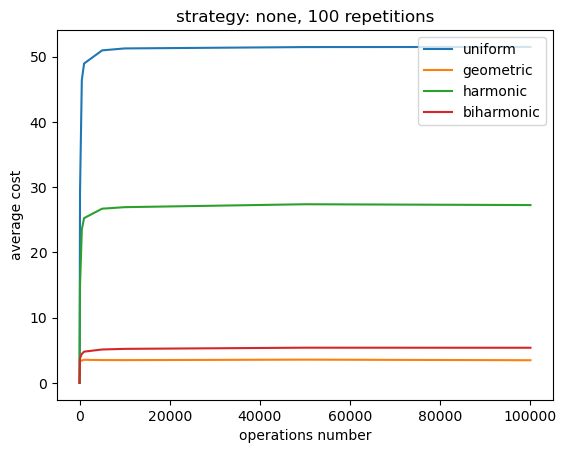

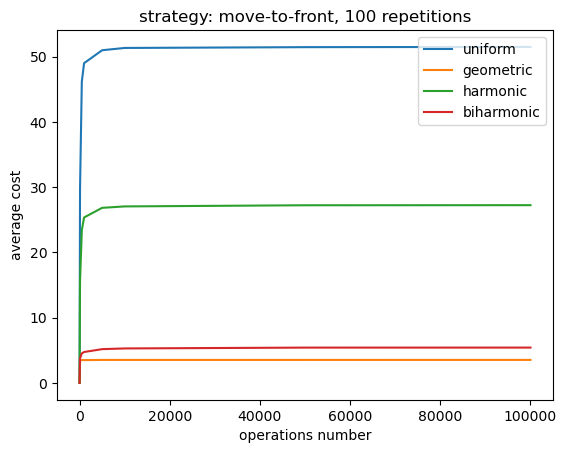

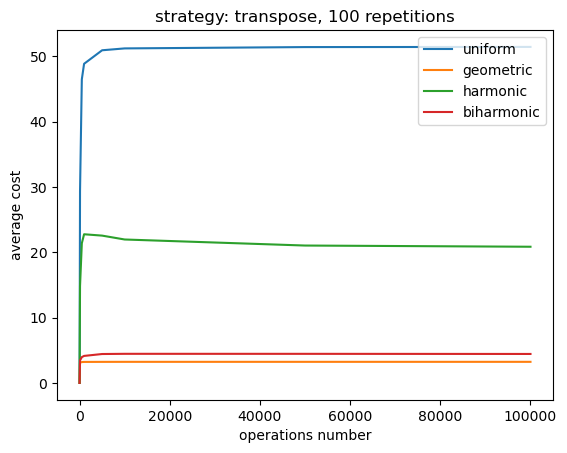

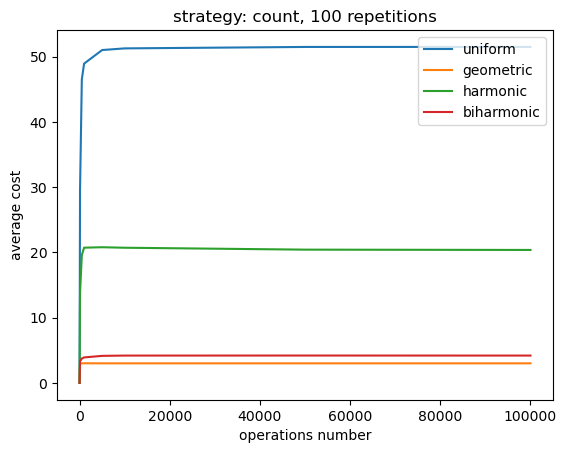

In [8]:
for strategy in STRATEGIES:
    for distribution in DISTRIBUTIONS:
        plt.plot(results[distribution][strategy]["xs"], results[distribution][strategy]["ys"], label=f"{distribution}")
    
    plt.xlabel("operations number")
    plt.ylabel("average cost")
    plt.title(f"strategy: {strategy}, {REPS} repetitions")
    plt.legend()
    plt.show()

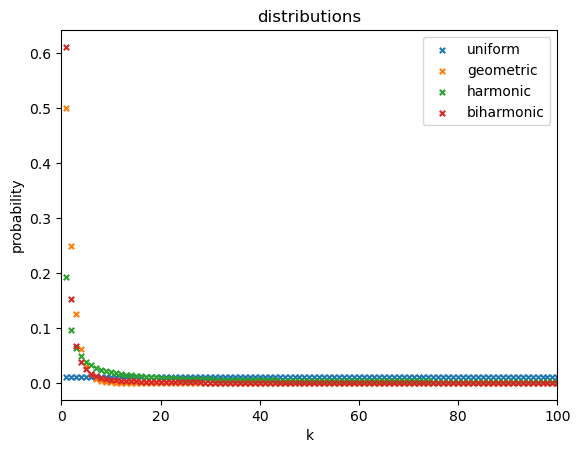

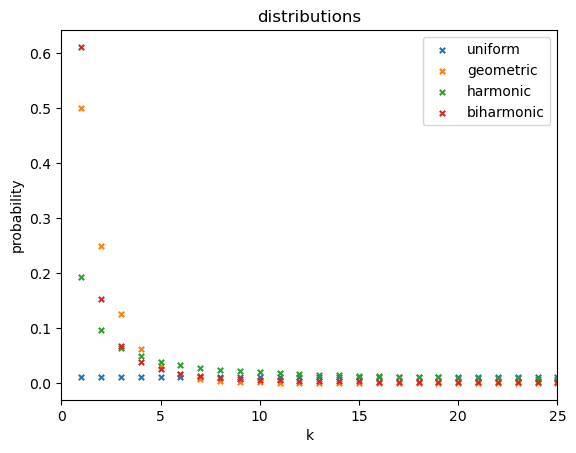

In [9]:
def harmonic_num(n ,k) -> float:
    return sum([1 / i**k for i in range(1, n + 1)])

def uniform(k: int) -> float:
    return 1 / 100

def geometrc(k: int) -> float:
    return 1 / (2 ** min(k, 99))

def harmonic(k: int) -> float:
    return 1 / k / harmonic_num(100, 1)

def biharmonic(k: int) -> float:
    return 1 / k**2 / harmonic_num(100, 2)

ks = []
us = []
gs = []
hs = []
bs = []
for k in range(1, 101):
    ks.append(k)
    us.append(uniform(k))
    gs.append(geometrc(k))
    hs.append(harmonic(k))
    bs.append(biharmonic(k))

for x_lims in [(0, 100), (0, 25)]:
    plt.scatter(ks, us, label="uniform", marker="x", s=15)
    plt.scatter(ks, gs, label="geometric", marker="x", s=15)
    plt.scatter(ks, hs, label="harmonic", marker="x", s=15)
    plt.scatter(ks, bs, label="biharmonic", marker="x", s=15)
    plt.title("distributions")
    plt.xlabel("k")
    plt.ylabel("probability")
    plt.legend()
    plt.xlim(x_lims)
    plt.show()